### 数据处理

In [1]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp

In [2]:
# url = 'https://raw.githubusercontent.com/ChenYifan617/i2p-assessment2/main/listings.csv'
# df = pd.read_csv(url, sep=',')
ershou = pd.read_csv(r'C:\Users\maggi\PycharmProjects\HoldLianjia\HoldLianjia\spiders\ershouhousing3.csv')
#输出dataframe的大小
print(f"Data frame is {ershou.shape[0]:,} x {ershou.shape[1]}")
#展示前5行数据
ershou.head()

Data frame is 2,495 x 23


,title,block,district,houseType,houseArea,houseOrientation,ouseCover,houseFloor,houseHistory,houseStructure,...,unitPrice,longitudeLatitude,"""longitudeLatitude""",houseVR,houseAge,anytime,subway,title_url,unitPrice_cat,totalPrice_cat
0,三甲医院 龙湖天街隔壁 禹洲天街 国妇婴 BRT 一手动迁,沿港河畔家园,奉贤金汇,2室1厅,71.35,南,毛坯,高楼层(共18层),NaN,板楼,...,29433,"121.509826,30.961856","""121.509826,30.961856""",VR房源,房本满两年,随时看房,NaN,https://sh.lianjia.com/ershoufang/107104296361...,4,300
1,非一楼两卫大两房，低总价，前排采光无遮挡,浦江宝邸,闵浦,2室2厅,107.15,南 北,简装,低楼层(共18层),2014.0,板楼,...,37985,"121.536706,31.047263","""121.536706,31.047263""",VR看装修,房本满五年,随时看房,NaN,https://sh.lianjia.com/ershoufang/107104262092...,4,500
2,满五大一房视野开阔采光好交通便利,莱阳北小区,金桥,1室1厅,45.08,南,简装,高楼层(共6层),1990.0,板楼,...,58785,"121.582957,31.276579","""121.582957,31.276579""",VR看装修,房本满五年,NaN,NaN,https://sh.lianjia.com/ershoufang/107104270492...,6,300
3,三甲医院 麦当劳 17年房龄 BRT 一手动迁,沿港河畔家园,奉贤金汇,1室1厅,51.15,南,毛坯,低楼层(共18层),NaN,板楼,...,30304,"121.509826,30.961856","""121.509826,30.961856""",VR看装修,房本满两年,NaN,NaN,https://sh.lianjia.com/ershoufang/107104301453...,4,300
4,虹桥前湾区域，此房满五税费少，精装修，适合刚需客户,虹桥晶邸,华漕,1室1厅,50.22,西南,精装,中楼层(共12层),2009.0,塔楼,...,40423,"121.293416,31.210755","""121.293416,31.210755""",VR看装修,房本满五年,NaN,NaN,https://sh.lianjia.com/ershoufang/107104309142...,6,300


In [3]:
ershou['longitude']=ershou['longitudeLatitude'].apply(lambda x: float(x.split(',')[0]))
ershou['latitude']=ershou['longitudeLatitude'].apply(lambda x: float(x.split(',')[1]))
ershou.head()

,title,block,district,houseType,houseArea,houseOrientation,ouseCover,houseFloor,houseHistory,houseStructure,...,"""longitudeLatitude""",houseVR,houseAge,anytime,subway,title_url,unitPrice_cat,totalPrice_cat,longitude,latitude
0,三甲医院 龙湖天街隔壁 禹洲天街 国妇婴 BRT 一手动迁,沿港河畔家园,奉贤金汇,2室1厅,71.35,南,毛坯,高楼层(共18层),NaN,板楼,...,"""121.509826,30.961856""",VR房源,房本满两年,随时看房,NaN,https://sh.lianjia.com/ershoufang/107104296361...,4,300,121.509826,30.961856
1,非一楼两卫大两房，低总价，前排采光无遮挡,浦江宝邸,闵浦,2室2厅,107.15,南 北,简装,低楼层(共18层),2014.0,板楼,...,"""121.536706,31.047263""",VR看装修,房本满五年,随时看房,NaN,https://sh.lianjia.com/ershoufang/107104262092...,4,500,121.536706,31.047263
2,满五大一房视野开阔采光好交通便利,莱阳北小区,金桥,1室1厅,45.08,南,简装,高楼层(共6层),1990.0,板楼,...,"""121.582957,31.276579""",VR看装修,房本满五年,NaN,NaN,https://sh.lianjia.com/ershoufang/107104270492...,6,300,121.582957,31.276579
3,三甲医院 麦当劳 17年房龄 BRT 一手动迁,沿港河畔家园,奉贤金汇,1室1厅,51.15,南,毛坯,低楼层(共18层),NaN,板楼,...,"""121.509826,30.961856""",VR看装修,房本满两年,NaN,NaN,https://sh.lianjia.com/ershoufang/107104301453...,4,300,121.509826,30.961856
4,虹桥前湾区域，此房满五税费少，精装修，适合刚需客户,虹桥晶邸,华漕,1室1厅,50.22,西南,精装,中楼层(共12层),2009.0,塔楼,...,"""121.293416,31.210755""",VR看装修,房本满五年,NaN,NaN,https://sh.lianjia.com/ershoufang/107104309142...,6,300,121.293416,31.210755


#### 基于经纬度将Airbnb数据转换为空间数据：

In [5]:
airbnb = gpd.GeoDataFrame(ershou, geometry=gpd.points_from_xy(ershou.longitude, ershou.latitude), crs='epsg:4326')
airbnb.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### 导入上海选取的地理文件：

In [6]:
# zone1 = gpd.read_file('https://github.com/ChenYifan617/i2p-assessment2/blob/main/block.gpkg?raw=true')
# zone1 = zone.to_crs(epsg=4326)
# zone1.crs
# zone1.info()

zone = gpd.read_file('C:\ProgramData\Anaconda3\Lib\site-packages\geopandas\datasets\China\上海市\上海市.shp')
zone = zone.to_crs(epsg=4326)
zone.crs
zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      1 non-null      object  
 1   geometry  1 non-null      geometry
dtypes: geometry(1), object(1)
memory usage: 144.0+ bytes


In [7]:
# """下载城市边界"""
# city = ox.geocode_to_gdf('shanghai')

# """基于范围下载路网"""
# G = ox.graph_from_bbox(22.5229, 22.5178, 113.9265, 113.9360, network_type='drive')
# G_projected = ox.project_graph(G)

# """保存为geodataframe"""
# nodes, edges = ox.graph_to_gdfs(G_projected)

# Xuhui.to_crs("EPSG:3857").plot()

#### 简单绘制一下二手房的点位分布图：

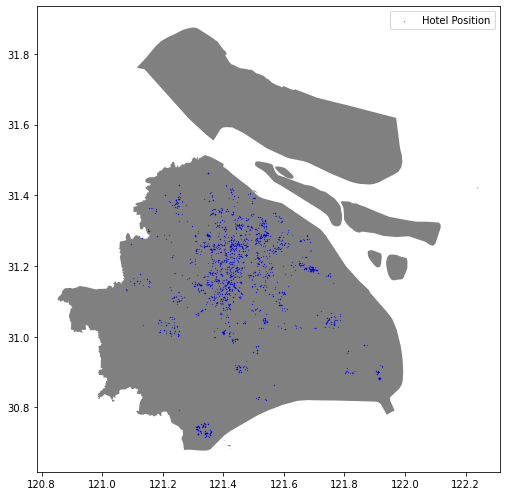

In [9]:
def hotelposition():
  f,ax = plt.subplots(figsize=(10,7))

  zone.plot(ax=ax, facecolor='gray');

  airbnb.plot(ax=ax, color='blue', markersize=0.05);

  plt.legend(['Hotel Position']);

  plt.tight_layout();
hotelposition()

#### 将Airbnb房价数据、交通事故数据聚合到伦敦选区地理图层中：

In [14]:
airbnb

,title,block,district,houseType,houseArea,houseOrientation,ouseCover,houseFloor,houseHistory,houseStructure,...,houseVR,houseAge,anytime,subway,title_url,unitPrice_cat,totalPrice_cat,longitude,latitude,geometry
0,三甲医院 龙湖天街隔壁 禹洲天街 国妇婴 BRT 一手动迁,沿港河畔家园,奉贤金汇,2室1厅,71.35,南,毛坯,高楼层(共18层),NaN,板楼,...,VR房源,房本满两年,随时看房,NaN,https://sh.lianjia.com/ershoufang/107104296361...,4,300,121.509826,30.961856,POINT (121.50983 30.96186)
1,非一楼两卫大两房，低总价，前排采光无遮挡,浦江宝邸,闵浦,2室2厅,107.15,南 北,简装,低楼层(共18层),2014.0,板楼,...,VR看装修,房本满五年,随时看房,NaN,https://sh.lianjia.com/ershoufang/107104262092...,4,500,121.536706,31.047263,POINT (121.53671 31.04726)
2,满五大一房视野开阔采光好交通便利,莱阳北小区,金桥,1室1厅,45.08,南,简装,高楼层(共6层),1990.0,板楼,...,VR看装修,房本满五年,NaN,NaN,https://sh.lianjia.com/ershoufang/107104270492...,6,300,121.582957,31.276579,POINT (121.58296 31.27658)
3,三甲医院 麦当劳 17年房龄 BRT 一手动迁,沿港河畔家园,奉贤金汇,1室1厅,51.15,南,毛坯,低楼层(共18层),NaN,板楼,...,VR看装修,房本满两年,NaN,NaN,https://sh.lianjia.com/ershoufang/107104301453...,4,300,121.509826,30.961856,POINT (121.50983 30.96186)
4,虹桥前湾区域，此房满五税费少，精装修，适合刚需客户,虹桥晶邸,华漕,1室1厅,50.22,西南,精装,中楼层(共12层),2009.0,塔楼,...,VR看装修,房本满五年,NaN,NaN,https://sh.lianjia.com/ershoufang/107104309142...,6,300,121.293416,31.210755,POINT (121.29342 31.21075)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,此房满五年，精装修，保养很好，一家三代居住无忧,顺驰美兰湖,罗店,3室2厅,116.74,南,精装,中楼层(共5层),2007.0,板楼,...,VR看装修,房本满两年,随时看房,NaN,https://sh.lianjia.com/ershoufang/107103863554...,6,500,121.356162,31.406894,POINT (121.35616 31.40689)
2491,售后公房 满五税费di 看房方便有钥匙 业主诚心卖,虬江路1110号,西藏北路,2室1厅,65.25,南 北,简装,中楼层(共7层),1983.0,板楼,...,VR看装修,房本满五年,随时看房,近地铁,https://sh.lianjia.com/ershoufang/107103513163...,10,700,121.471478,31.250754,POINT (121.47148 31.25075)
2492,品质洋房有车位楼层适中采光好配套全交通便利诚意出售,鹏润伊顿公馆,惠南,3室2厅,215.75,南 北,毛坯,中楼层(共5层),2013.0,板楼,...,VR房源,房本满两年,随时看房,NaN,https://sh.lianjia.com/ershoufang/107103746530...,4,700,121.784520,31.058335,POINT (121.78452 31.05833)
2493,绿地集团带地下室，双层复式，满五税少，随时可以看，,布鲁斯小镇(二期),惠南,3室2厅,169.47,南 北,毛坯,低楼层(共14层),2011.0,板楼,...,VR房源,房本满五年,随时看房,NaN,https://sh.lianjia.com/ershoufang/107103693490...,4,500,121.765985,31.033594,POINT (121.76599 31.03359)


In [13]:
#进行空间连接
airbnb_zone = gpd.sjoin(airbnb,zone, how="inner", op="within")
# crash_zone = gpd.sjoin(geocrash,zone, how="inner", op="within")

# #计算每个选区的交通事故频次
# countcrash = crash_zone['POLY_ID'].value_counts()
# count_crash= countcrash.to_frame()
# count_crash= count_crash.rename(columns={'POLY_ID':'count'})
# count_crash['POLY_ID'] = count_crash.index

# #计算每个选取的平均房价
# meanprice = airbnb_zone.groupby('POLY_ID').mean()['price']
# mean_price = meanprice.to_frame()

# #将房价和事故频次聚合至选区图层
# merge_temp = zone.merge(mean_price,how = 'left',on='POLY_ID')
# final_zone = merge_temp.merge(count_crash,how = 'left',on='POLY_ID')

# #对于房价缺失的图层，用均值填充
# final_zone.price.fillna(105, inplace=True)
airbnb_zone 

,title,block,district,houseType,houseArea,houseOrientation,ouseCover,houseFloor,houseHistory,houseStructure,...,anytime,subway,title_url,unitPrice_cat,totalPrice_cat,longitude,latitude,geometry,index_right,Name
0,三甲医院 龙湖天街隔壁 禹洲天街 国妇婴 BRT 一手动迁,沿港河畔家园,奉贤金汇,2室1厅,71.35,南,毛坯,高楼层(共18层),NaN,板楼,...,随时看房,NaN,https://sh.lianjia.com/ershoufang/107104296361...,4,300,121.509826,30.961856,POINT (121.50983 30.96186),0,ÉÏº£ÊÐ
1,非一楼两卫大两房，低总价，前排采光无遮挡,浦江宝邸,闵浦,2室2厅,107.15,南 北,简装,低楼层(共18层),2014.0,板楼,...,随时看房,NaN,https://sh.lianjia.com/ershoufang/107104262092...,4,500,121.536706,31.047263,POINT (121.53671 31.04726),0,ÉÏº£ÊÐ
2,满五大一房视野开阔采光好交通便利,莱阳北小区,金桥,1室1厅,45.08,南,简装,高楼层(共6层),1990.0,板楼,...,NaN,NaN,https://sh.lianjia.com/ershoufang/107104270492...,6,300,121.582957,31.276579,POINT (121.58296 31.27658),0,ÉÏº£ÊÐ
3,三甲医院 麦当劳 17年房龄 BRT 一手动迁,沿港河畔家园,奉贤金汇,1室1厅,51.15,南,毛坯,低楼层(共18层),NaN,板楼,...,NaN,NaN,https://sh.lianjia.com/ershoufang/107104301453...,4,300,121.509826,30.961856,POINT (121.50983 30.96186),0,ÉÏº£ÊÐ
4,虹桥前湾区域，此房满五税费少，精装修，适合刚需客户,虹桥晶邸,华漕,1室1厅,50.22,西南,精装,中楼层(共12层),2009.0,塔楼,...,NaN,NaN,https://sh.lianjia.com/ershoufang/107104309142...,6,300,121.293416,31.210755,POINT (121.29342 31.21075),0,ÉÏº£ÊÐ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,此房满五年，精装修，保养很好，一家三代居住无忧,顺驰美兰湖,罗店,3室2厅,116.74,南,精装,中楼层(共5层),2007.0,板楼,...,随时看房,NaN,https://sh.lianjia.com/ershoufang/107103863554...,6,500,121.356162,31.406894,POINT (121.35616 31.40689),0,ÉÏº£ÊÐ
2491,售后公房 满五税费di 看房方便有钥匙 业主诚心卖,虬江路1110号,西藏北路,2室1厅,65.25,南 北,简装,中楼层(共7层),1983.0,板楼,...,随时看房,近地铁,https://sh.lianjia.com/ershoufang/107103513163...,10,700,121.471478,31.250754,POINT (121.47148 31.25075),0,ÉÏº£ÊÐ
2492,品质洋房有车位楼层适中采光好配套全交通便利诚意出售,鹏润伊顿公馆,惠南,3室2厅,215.75,南 北,毛坯,中楼层(共5层),2013.0,板楼,...,随时看房,NaN,https://sh.lianjia.com/ershoufang/107103746530...,4,700,121.784520,31.058335,POINT (121.78452 31.05833),0,ÉÏº£ÊÐ
2493,绿地集团带地下室，双层复式，满五税少，随时可以看，,布鲁斯小镇(二期),惠南,3室2厅,169.47,南 北,毛坯,低楼层(共14层),2011.0,板楼,...,随时看房,NaN,https://sh.lianjia.com/ershoufang/107103693490...,4,500,121.765985,31.033594,POINT (121.76599 31.03359),0,ÉÏº£ÊÐ


### 专题地图制作

In [10]:
airbnb.columns

Index(['title', 'block', 'district', 'houseType', 'houseArea',
       'houseOrientation', 'ouseCover', 'houseFloor', 'houseHistory',
       'houseStructure', 'houseFollowing', 'houseRelease', 'totalPrice',
       'unitPrice', 'longitudeLatitude', '"longitudeLatitude"', 'houseVR',
       'houseAge', 'anytime', 'subway', 'title_url', 'unitPrice_cat',
       'totalPrice_cat', 'longitude', 'latitude', 'geometry'],
      dtype='object')

In [23]:
min(airbnb['totalPrice'])

46.0

In [24]:
max(airbnb['totalPrice'])

7900.0

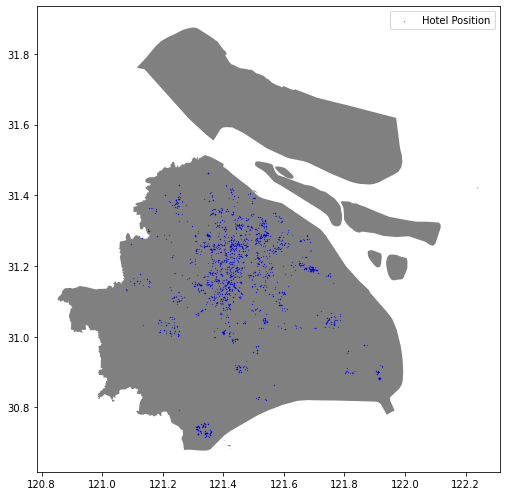

In [34]:
def hotelposition():
  f,ax = plt.subplots(figsize=(10,7))

  zone.plot(ax=ax, facecolor='gray');

  airbnb.plot(ax=ax, color='blue', markersize=0.05);

  plt.legend(['Hotel Position']);

  plt.tight_layout();
hotelposition()

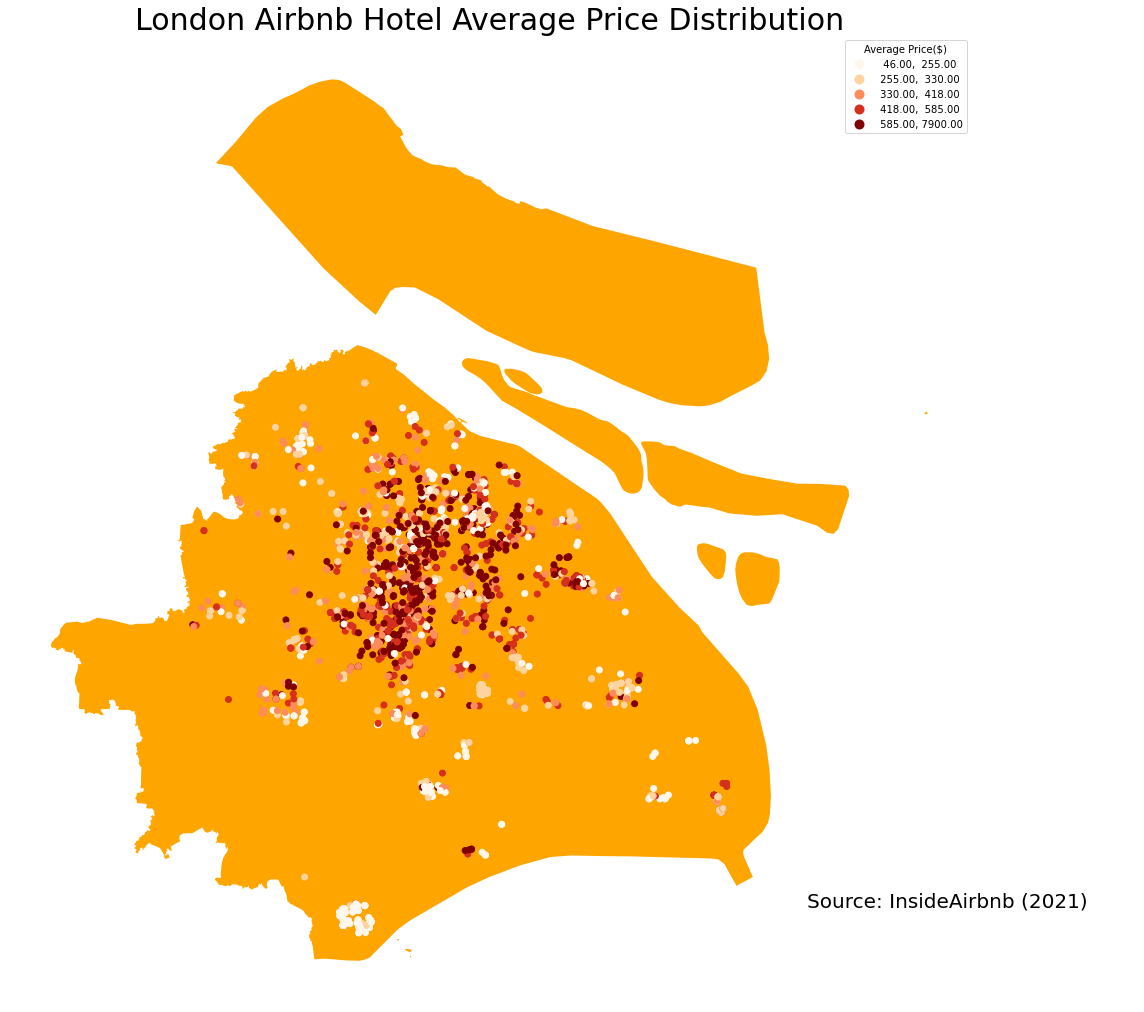

In [41]:
#绘制伦敦地区的房价分布图
import mapclassify
def pricemap():
    f,ax = plt.subplots(figsize=(20,14))
    zone.plot(ax=ax, facecolor='orange')
    airbnb_zone.plot(ax=ax,column='totalPrice', cmap='OrRd',scheme='quantiles',legend=True)
    
    plt.tight_layout()
    ax.axis('off') 
    ax.set_title('London Airbnb Hotel Average Price Distribution',fontdict={'fontsize':'30', 'fontweight':'5'})
    a = ax.annotate('Source: InsideAirbnb (2021)',
                 xy=(0.95, 0.1), xycoords='figure fraction', 
                 horizontalalignment='right', verticalalignment='bottom', 
                 fontsize=20, fontweight=4)
    a.set_bbox(dict(facecolor='white', alpha=0.95, edgecolor='white'))
    ax.get_legend().set_title("Average Price($)")
    
pricemap()

In [43]:
type(airbnb)

geopandas.geodataframe.GeoDataFrame

In [44]:
# How many lands of each type are there?
airbnb.houseType.value_counts()

2室1厅    729
3室2厅    462
1室1厅    451
2室2厅    450
3室1厅    121
4室2厅     88
1室0厅     59
2室0厅     44
1室2厅     26
5室2厅     24
4室3厅     10
4室1厅      9
6室2厅      5
6室3厅      5
5室3厅      4
3室0厅      3
3室3厅      2
5室1厅      1
4室4厅      1
7室2厅      1
Name: houseType, dtype: int64

<AxesSubplot:>

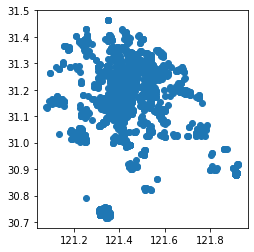

In [45]:
airbnb.plot()

In [46]:
# View the first five entries in the "geometry" column
airbnb.geometry.head()

0    POINT (121.50983 30.96186)
1    POINT (121.53671 31.04726)
2    POINT (121.58296 31.27658)
3    POINT (121.50983 30.96186)
4    POINT (121.29342 31.21075)
Name: geometry, dtype: geometry